# Stats Review M1

### Requirements

In [27]:
from scipy import stats
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math

## Correlation

In [4]:
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24

In [6]:
corr_tpl = stats.pearsonr(
    x=Xs,
    y=Ys
)

In [7]:
corr_tpl

PearsonRResult(statistic=0.8391399162310662, pvalue=2.994565602899767e-07)

## Linear Regression

In [8]:
linear_map = stats.linregress(
    x=Xs,
    y=Ys
)

In [9]:
linear_map

LinregressResult(slope=447.87059914099837, intercept=13.610139085217043, rvalue=0.8391399162310663, pvalue=2.994565602899751e-07, stderr=61.89254821132255, intercept_stderr=69.34723133511908)

## Correcting simple nonlinear relationships

In [11]:
frame = pd.DataFrame({
    "Xs" : [ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ],
    "Ys" :[ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ]
})
N = 9

In [5]:
Xs.shape

(1, 9)

In [6]:
Ys.shape

(9,)

In [3]:
corr_tpl = stats.pearsonr(
    x=Xs,
    y=Ys
)

print(corr_tpl)

PearsonRResult(statistic=0.9888323018726735, pvalue=4.793856920237897e-07)


In [4]:
fig = px.scatter(x=Xs, y=Ys)
fig.show()

In [13]:
reg = LinearRegression().fit(X = frame[['Xs']], y=frame[['Ys']])

In [15]:
frame["predictions"]= reg.predict(frame[['Xs']])

In [19]:
frame["residuals"] = frame.Ys - frame.predictions

In [20]:
fig = px.scatter( x=frame.Xs, y=frame.residuals)
fig.show()

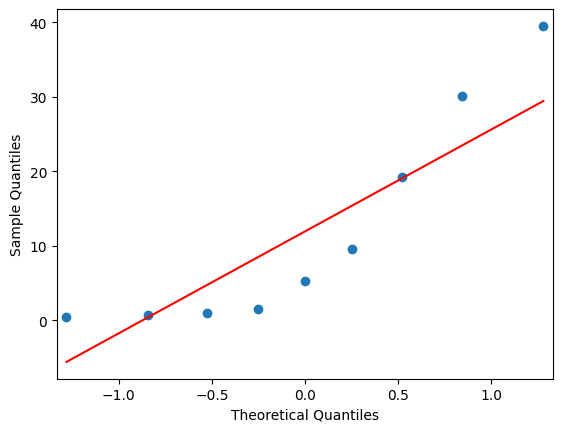

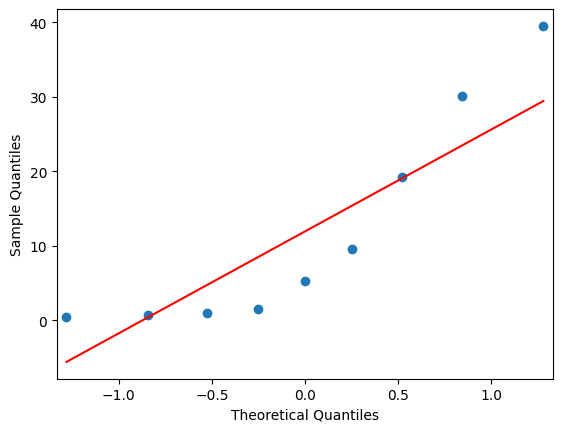

In [26]:
sm.qqplot(frame.Xs, line='s')


In [29]:
frame = (
    frame
    .assign(
        lny = lambda X: X.Ys.map(lambda y: math.log(y)),
        lnx = lambda X: X.Xs.map(lambda y: math.log(y)),
        y2 = lambda X: X.Ys.map(lambda y: y**2),
    )
)

In [30]:
fig = px.scatter( x=frame.Xs, y=frame.lny)
fig.show()

In [33]:
fig = px.scatter( x=frame[["lnx"]], y=frame[["lny"]])
fig.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (9, 1) instead

In [34]:
reg = LinearRegression().fit(X=frame[["lnx"]], y=frame[["lny"]])

In [38]:
reg.coef_

array([[1.49953258]])

In [39]:
reg.coef_

array([[1.49953258]])